# Detect Labels, Faces, and Landmarks in Images with the Cloud Vision API

GSP037

https://www.cloudskillsboost.google/focuses/1841?parent=catalog&qlcampaign=1p-EDUCR-SG-2021-MAJULAHGCP-2-25

### Overview
The Cloud Vision API lets you understand the content of an image by encapsulating powerful machine learning models in a simple REST API.

In this lab, we will send images to the Vision API and see it detect objects, faces, and landmarks.

What you'll learn
- Creating a Vision API request and calling the API with `curl`
- Using the label, face, and landmark detection methods of the vision API

# Activate Cloud Shell
Cloud Shell is a virtual machine that is loaded with development tools. It offers a persistent 5GB home directory and runs on the Google Cloud. Cloud Shell provides command-line access to your Google Cloud resources.

In the Cloud Console, in the top right toolbar, click the `Activate Cloud Shell` button.

You can list the active account name with this command:

In [ ]:
gcloud auth list

You can list the project ID with this command:

In [ ]:
gcloud config list project

# Create an API Key

To create an API key, navigate to `APIs & Services` > `Credentials` in your Cloud console. Click `CREATE CREDENTIALS` and select `API key`. 

Now save it to an environment variable to avoid having to insert the value of your API key in each request.

Run the following in Cloud Shell, replacing <your_api_key> with the key you just copied

In [ ]:
export API_KEY=<YOUR_API_KEY>

# Upload an Image to a Cloud Storage bucket

### Creating a Cloud Storage bucket

There are two ways to send an image to the Vision API for image detection: by sending the API a base64 encoded image string, or passing it the URL of a file stored in Cloud Storage. We'll be using a Cloud Storage URL. The first step is to create a Cloud Storage bucket to store our images.

Navigate to `Navigation menu` > `Cloud Storage` in the Cloud console for your project, then click `CREATE BUCKET`.

After naming your bucket, click `Choose how to control access to objects`.

Uncheck `Enforce public access prevention on this bucket` and select the `Fine-grained` circle. All other settings for your bucket can remain as the default setting. Click `CREATE`.

### Upload image to your bucket

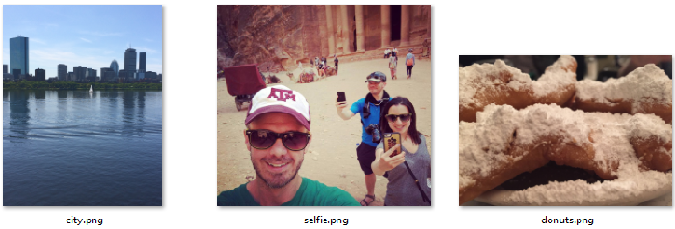

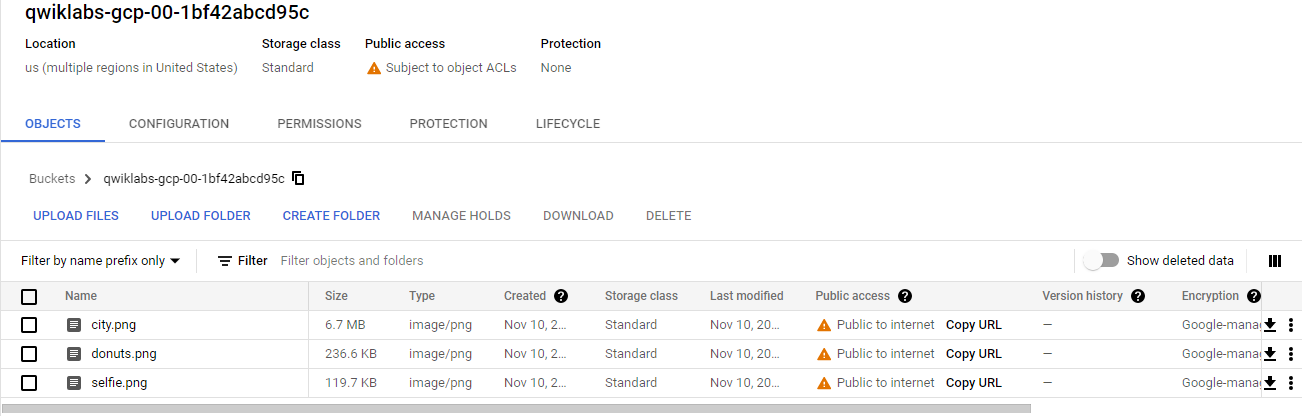

Now you need to make the image publicly available. Click on the 3 dots for the image and select `Edit Permissions`.

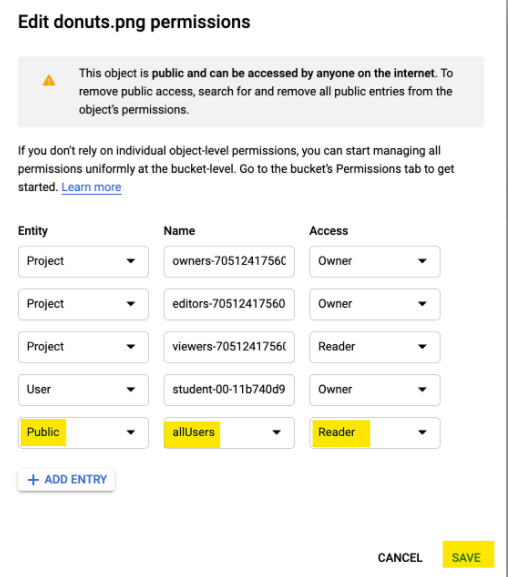

# Create your Vision API request

Now you'll create a `request.json` file in the Cloud Shell environment.

Using the Cloud Shell code editor (by clicking the pencil icon in the Cloud Shell ribbon), or your preferred command line editor (`nano`, `vim`, or `emacs`), create a `request.json` file.

In [ ]:
nano request.json

Type or paste the following code into the file, and save the file.

In [ ]:
{
  "requests": [
      {
        "image": {
          "source": {
              "gcsImageUri": "gs://my-bucket-name/donuts.png"
          }
        },
        "features": [
          {
            "type": "LABEL_DETECTION",
            "maxResults": 10
          }
        ]
      }
  ]
}

# 1. Label Detection

The first Cloud Vision API feature you'll try out is label detection. This method will return a list of labels (words) of what's in your image.

Call the Vision API with `curl`:

In [ ]:
curl -s -X POST -H "Content-Type: application/json" --data-binary @request.json  https://vision.googleapis.com/v1/images:annotate?key=${API_KEY}

Your response should look something like the following:

In [ ]:
{
  "responses": [
    {
      "labelAnnotations": [
        {
          "mid": "/m/01dk8s",
          "description": "Powdered sugar",
          "score": 0.9861496,
          "topicality": 0.9861496
        },
        {
          "mid": "/m/01wydv",
          "description": "Beignet",
          "score": 0.9565117,
          "topicality": 0.9565117
        },
        {
          "mid": "/m/02wbm",
          "description": "Food",
          "score": 0.9424965,
          "topicality": 0.9424965
        },
        {
          "mid": "/m/0hnyx",
          "description": "Pastry",
          "score": 0.8173416,
          "topicality": 0.8173416
        },
        {
          "mid": "/m/02q08p0",
          "description": "Dish",
          "score": 0.8076026,
          "topicality": 0.8076026
        },
        {
          "mid": "/m/01ykh",
          "description": "Cuisine",
          "score": 0.79036003,
          "topicality": 0.79036003
        },
        {
          "mid": "/m/03nsjgy",
          "description": "Kourabiedes",
          "score": 0.77726763,
          "topicality": 0.77726763
        },
        {
          "mid": "/m/06gd3r",
          "description": "Angel wings",
          "score": 0.73792106,
          "topicality": 0.73792106
        },
        {
          "mid": "/m/06x4c",
          "description": "Sugar",
          "score": 0.71921736,
          "topicality": 0.71921736
        },
        {
          "mid": "/m/01zl9v",
          "description": "Zeppole",
          "score": 0.7111677,
          "topicality": 0.7111677
        }
      ]
    }
  ]
}

The API was able to identify the specific type of donuts these are, powdered sugar. Cool! For each label the Vision API found, it returns a:

-`description` with the name of the item.
-`score`, a number from 0 - 1 indicating how confident it is that the description matches what's in the image.
-`mid` value that maps to the item's mid in Google's [Knowledge Graph](https://www.google.com/intl/bn/insidesearch/features/search/knowledge.html). You can use the `mid` when calling the [Knowledge Graph API](https://developers.google.com/knowledge-graph/) to get more information on the item.


# 2. Web Detection
In addition to getting labels on what's in your image, the Vision API can also search the Internet for additional details on your image. Through the API's [webDetection method](https://cloud.google.com/vision/docs/reference/rest/v1/images/annotate#WebDetection), you get a lot of interesting data back:

- A list of entities found in your image, based on content from pages with similar images
- URLs of exact and partial matching images found across the web, along with the URLs of those pages
- URLs of similar images, like doing a reverse image search

To try out web detection, use the same image of beignets and change one line in the `request.json` file (you can also venture out into the unknown and use an entirely different image).

Under the features list, change type from `LABEL_DETECTION` to `WEB_DETECTION`. The `request.json` should now look like this:

In [ ]:
{
  "requests": [
      {
        "image": {
          "source": {
              "gcsImageUri": "gs://my-bucket-name/donuts.png"
          }
        },
        "features": [
          {
            "type": "WEB_DETECTION",
            "maxResults": 10
          }
        ]
      }
  ]
}

Save the file.

To send it to the Vision API, use the same `curl` command as before (just press the up arrow in Cloud Shell):

In [ ]:
curl -s -X POST -H "Content-Type: application/json" --data-binary @request.json  https://vision.googleapis.com/v1/images:annotate?key=${API_KEY}

Dive into the response, starting with `webEntities`. Here are some of the entities this image returned:

In [ ]:
{
  "responses": [
    {
      "webDetection": {
        "webEntities": [
          {
            "entityId": "/m/0z5n",
            "score": 0.8868,
            "description": "Application programming interface"
          },
          {
            "entityId": "/m/07kg1sq",
            "score": 0.3139,
            "description": "Encapsulation"
          },
          {
            "entityId": "/m/0105pbj4",
            "score": 0.2713,
            "description": "Google Cloud Platform"
          },
          {
            "entityId": "/m/01hyh_",
            "score": 0.2594,
            "description": "Machine learning"
          },
          ...
        ]

This image has been used in many presentations on Cloud ML APIs, which is why the API found the entities "Machine learning" and "Google Cloud Platform".

If you inpsect the URLs under `fullMatchingImages`, `partialMatchingImages`, and `pagesWithMatchingImages`, you'll notice that many of the URLs point to this lab site (super meta!).

Say you wanted to find other images of beignets, but not the exact same images. That's where the `visuallySimilarImages` part of the API response comes in handy. Here are a few of the visually similar images it found:

In [ ]:
        "visuallySimilarImages": [
          {
            "url": "https://media.istockphoto.com/photos/cafe-du-monde-picture-id1063530570?k=6&m=1063530570&s=612x612&w=0&h=b74EYAjlfxMw8G-G_6BW-6ltP9Y2UFQ3TjZopN-pigI="
          },
          {
            "url": "https://s3-media2.fl.yelpcdn.com/bphoto/oid0KchdCqlSqZzpznCEoA/o.jpg"
          },
          {
            "url": "https://s3-media1.fl.yelpcdn.com/bphoto/mgAhrlLFvXe0IkT5UMOUlw/348s.jpg"
          },
          ...
]

You can navigate to those URLs to see the similar images:

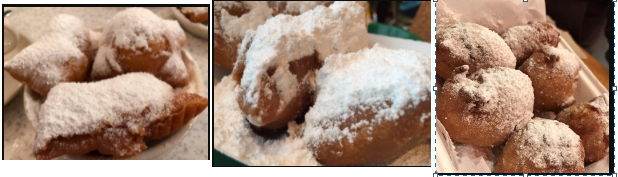

And now you probably really want a powdered sugar beignet (sorry)! This is similar to searching by an image on Google Images.

With Cloud Vision you can access this functionality with an easy to use REST API and integrate it into your applications.

# 3. Face Detection

Next explore the face detection methods of the Vision API.

The face detection method returns data on faces found in an image, including the emotions of the faces and their location in the image.

Update the `request.json` file with the following, which includes the URL of the new image, and uses face and landmark detection instead of label detection. Be sure to replace my-bucket-name with the name of your Cloud Storage bucket:

In [ ]:
{
  "requests": [
      {
        "image": {
          "source": {
              "gcsImageUri": "gs://my-bucket-name/selfie.png"
          }
        },
        "features": [
          {
            "type": "FACE_DETECTION"
          },
          {
            "type": "LANDMARK_DETECTION"
          }
        ]
      }
  ]
}

### Calling the Vision API and parsing the response

Now you're ready to call the Vision API using the same `curl` command you used above:

In [ ]:
curl -s -X POST -H "Content-Type: application/json" --data-binary @request.json  https://vision.googleapis.com/v1/images:annotate?key=${API_KEY}

Take a look at the `faceAnnotations` object in the response. You'll notice the API returns an object for each face found in the image - in this case, three. Here's a clipped version of the response:

In [ ]:
{
      "faceAnnotations": [
        {
          "boundingPoly": {
            "vertices": [
              {
                "x": 669,
                "y": 324
              },
              ...
            ]
          },
          "fdBoundingPoly": {
            ...
          },
          "landmarks": [
            {
              "type": "LEFT_EYE",
              "position": {
                "x": 692.05646,
                "y": 372.95868,
                "z": -0.00025268539
              }
            },
            ...
          ],
          "rollAngle": 0.21619819,
          "panAngle": -23.027969,
          "tiltAngle": -1.5531756,
          "detectionConfidence": 0.72354823,
          "landmarkingConfidence": 0.20047489,
          "joyLikelihood": "LIKELY",
          "sorrowLikelihood": "VERY_UNLIKELY",
          "angerLikelihood": "VERY_UNLIKELY",
          "surpriseLikelihood": "VERY_UNLIKELY",
          "underExposedLikelihood": "VERY_UNLIKELY",
          "blurredLikelihood": "VERY_UNLIKELY",
          "headwearLikelihood": "VERY_LIKELY"
        }
        ...
     }
}

- `boundingPoly` gives you the x,y coordinates around the face in the image.
- `fdBoundingPoly` is a smaller box than `boundingPoly`, focusing on the skin part of the face.
- `landmarks` is an array of objects for each facial feature, some you may not have even known about. This tells us the type of landmark, along with the 3D position of that feature (x,y,z coordinates) where the z coordinate is the depth. The remaining values gives you more details on the face, including the likelihood of joy, sorrow, anger, and surprise.

The response you're reading is for the person standing furthest back in the image - you can see he's making kind of a silly face which explains the `joyLikelihood` of `LIKELY`.

# 4. Landmark Annotation

Landmark detection can identify common (and obscure) landmarks. It returns the name of the landmark, its latitude and longitude coordinates, and the location of where the landmark was identified in an image.

Update the `request.json` file with the following, which includes the URL of the new image, and uses landmark detection. Be sure to replace my-bucket-name with the name of your Cloud Storage bucket:

In [ ]:
{
  "requests": [
      {
        "image": {
          "source": {
              "gcsImageUri": "gs://my-bucket-name/city.png"
          }
        },
        "features": [
          {
            "type": "LANDMARK_DETECTION",
            "maxResults": 10,
          }
        ]
      }
  ]
}

Now you're ready to call the Vision API using the same `curl` command you used above:

In [ ]:
curl -s -X POST -H "Content-Type: application/json" --data-binary @request.json  https://vision.googleapis.com/v1/images:annotate?key=${API_KEY}

Next, look at the `landmarkAnnotations` part of the response:

In [ ]:
      "landmarkAnnotations": [
        {
          "mid": "/m/041cp3",
          "description": "Boston",
          "score": 0.788803,
          "boundingPoly": {
            "vertices": [
              {
                "y": 576
              },
              {
                "x": 1942,
                "y": 576
              },
              {
                "x": 1942,
                "y": 1224
              },
              {
                "y": 1224
              }
            ]
          },
...

Here, the Vision API was able to tell that this picture was taken in Boston, and gives you a map of the exact location. The values in this response should look similar to the `labelAnnotations` response above:

- the `mid` of the landmark
- it's name (`description`)
- a confidence `score`
- The `boundingPoly` shows the region in the image where the landmark was identified.
- The `locations` key tells us the latitude longitude coordinates of the picture.

# Explore other Vision API methods

You've looked at the Vision API's label, face, and landmark detection methods, but there are three others you haven't explored. Dive into [the docs](https://cloud.google.com/vision/reference/rest/v1/images/annotate#Feature) to learn about the other three:

- **Logo detectio**: identify common logos and their location in an image.

- **Safe search detection**: determine whether or not an image contains explicit content. This is useful for any application with user-generated content. You can filter images based on four factors: adult, medical, violent, and spoof content.

- **Text detection**: run OCR to extract text from images. This method can even identify the language of text present in an image.